### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the dataset

In [2]:
data=pd.read_csv("DS_Jobs_cleaned.csv",index_col=0)
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,natural language processing,machine learning,deep learning,numpy,pandas,matplotlib,seaborn,sklearn,scipy,Age
index,,,,,,,,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,...,0,1,0,0,0,0,0,0,0,30.0
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,...,0,1,0,0,0,0,0,0,0,55.0
2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,...,1,1,0,0,0,0,0,0,0,42.0
3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,...,0,1,1,0,0,0,0,0,0,23.0
4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,...,0,1,0,0,0,0,0,0,0,25.0


### Some of the objectives we need to achieve:

-- Look for some of the most demanded skills in the industry.

-- Is there a huge difference in the demand of various Job titles.

-- How many postings are there for the senior roles and the junior roles?

-- Companies with maximum number of Job Postings.

#### Converting a wider format dataset into a longer format one to ease analysis:

In [3]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary Estimate', 'Max Salary Estimate', 'Avg Salary Estimate',
       'python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big data',
       'sql', 'natural language processing', 'machine learning',
       'deep learning', 'numpy', 'pandas', 'matplotlib', 'seaborn', 'sklearn',
       'scipy', 'Age'],
      dtype='object')

In [4]:
data_melt=data.melt(id_vars=['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary Estimate', 'Max Salary Estimate', 'Avg Salary Estimate',"Age"],var_name="Skills",value_name="isRequired")
data_melt.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary Estimate,Max Salary Estimate,Avg Salary Estimate,Age,Skills,isRequired
0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154.0,30.0,python,0
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),NaN,137,171,154.0,55.0,python,0


### Let's check for the most demanded skills in the industry

In [5]:
skill_cnt=data_melt.groupby("Skills").agg(s_count=("isRequired","sum")).reset_index().sort_values(["s_count"],ascending=False)
skill_cnt["Skills"]=skill_cnt["Skills"].str.capitalize()
skill_cnt

,Skills,s_count
10,Python,479
5,Machine learning,404
15,Sql,354
3,Excel,295
14,Spark,177
0,Aws,163
4,Hadoop,142
1,Big data,138
16,Tableau,122
2,Deep learning,97


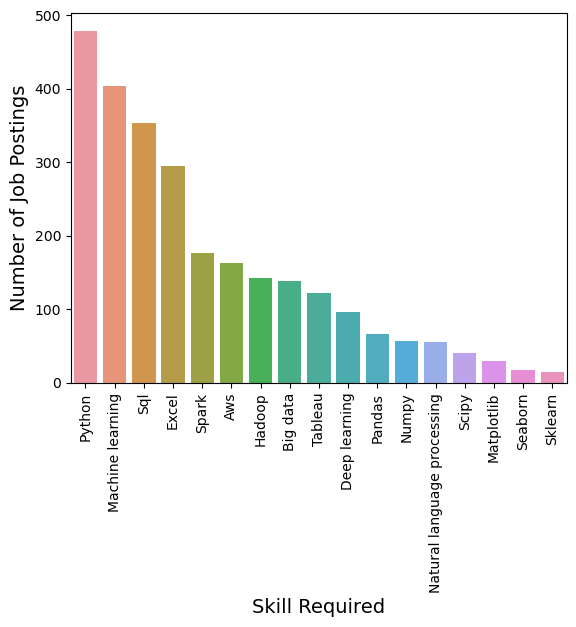

In [6]:
sns.barplot(data=skill_cnt,x="Skills",y="s_count")
plt.xticks(rotation=90)
plt.xlabel("Skill Required",fontsize=14)
plt.ylabel("Number of Job Postings",fontsize=14)
plt.show()

The most demanded skill in the industry is "Python" followed by "Machine Learning", "SQL" and "Excel".

Now,let's check if there are any job postings where none among these skills are explicitly enlisted in the job description:

In [7]:
#Generating the function for inspection
lst=[]
for j in data.columns[17:]:
    lst.append(("(data['"+j+"']==0)"))
" & ".join(lst)

"(data['python']==0) & (data['excel']==0) & (data['hadoop']==0) & (data['spark']==0) & (data['aws']==0) & (data['tableau']==0) & (data['big data']==0) & (data['sql']==0) & (data['natural language processing']==0) & (data['machine learning']==0) & (data['deep learning']==0) & (data['numpy']==0) & (data['pandas']==0) & (data['matplotlib']==0) & (data['seaborn']==0) & (data['sklearn']==0) & (data['scipy']==0) & (data['Age']==0)"

In [8]:
data.loc[(data['python']==0) & (data['excel']==0) & (data['hadoop']==0) & (data['spark']==0) & (data['aws']==0) & (data['tableau']==0) & (data['big data']==0) & (data['sql']==0) & (data['natural language processing']==0) & (data['machine learning']==0) & (data['deep learning']==0) & (data['numpy']==0) & (data['pandas']==0) & (data['matplotlib']==0) & (data['seaborn']==0) & (data['sklearn']==0) & (data['scipy']==0)]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,natural language processing,machine learning,deep learning,numpy,pandas,matplotlib,seaborn,sklearn,scipy,Age
index,,,,,,,,,,,,,,,,,,,,,
8,Staff Data Scientist - Analytics,$137K-$171K,Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,1983.0,Company - Public,...,0,0,0,0,0,0,0,0,0,40.0
19,Medical Lab Scientist,$137K-$171K,Responsibilities\n\n\nThe Medical Laboratory S...,3.5,Tower Health,"West Grove, PA","Reading, PA",5001 to 10000 employees,2017.0,Nonprofit Organization,...,0,0,0,0,0,0,0,0,0,6.0
23,Business Intelligence Analyst I- Data Insights,$137K-$171K,Position Summary\n\nIndividuals within the\nBu...,3.5,Guardian Life,"Appleton, WI","New York, NY",5001 to 10000 employees,1860.0,Company - Private,...,0,0,0,0,0,0,0,0,0,163.0
33,Senior Research Statistician- Data Scientist,$75K-$131K,Acuity is seeking a Senior Research Statistici...,4.8,Acuity Insurance,"Sheboygan, WI","Sheboygan, WI",1001 to 5000 employees,1925.0,Company - Private,...,0,0,0,0,0,0,0,0,0,98.0
43,Scientist - Molecular Biology,$75K-$131K,ArsenalBio’s mission is to develop efficacious...,5.0,Arsenal Biosciences,"South San Francisco, CA","South San Francisco, CA",51 to 200 employees,2019.0,Company - Private,...,0,0,0,0,0,0,0,0,0,4.0
74,Purification Scientist,$79K-$131K,New England Biolabs (NEB) is seeking highly mo...,4.9,New England Biolabs,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974.0,Company - Private,...,0,0,0,0,0,0,0,0,0,49.0
81,Data Scientist,$79K-$131K,The Senior Data Scientist will build and impro...,3.6,Powertek,"Washington, DC","Rockville, MD",51 to 200 employees,2001.0,Company - Private,...,0,0,0,0,0,0,0,0,0,22.0
86,Data Analyst,$79K-$131K,What are we looking for in a Data Analyst?\n\n...,2.6,Comprehensive Healthcare,"Yakima, WA","Yakima, WA",501 to 1000 employees,1971.0,Nonprofit Organization,...,0,0,0,0,0,0,0,0,0,52.0
95,Staff Data Scientist - Analytics,$99K-$132K,Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,1983.0,Company - Public,...,0,0,0,0,0,0,0,0,0,40.0


###### So, there are 40 job postings where none of these skills are explicitly mentioned.

Let's look at the job description for one of these

In [9]:
data["Job Description"].loc[33].split("\n")

['Acuity is seeking a Senior Research Statistician- Data Scientist to use statistical knowledge and research skills to solve business problems. The Research Statistician will develop, implement, and interpret statistical models with a strong emphasis on data mining and statistical/predictive modeling. Provides work direction.',
 'ESSENTIAL FUNCTIONS:',
 'Identifies and acquires additional data sources, both internal and external, that can be used to enhance analyses.',
 'Lead the development of analytical models to drive superior business outcomes.',
 'Develop in-depth understanding of drivers for optimization by utilizing statistics and data mining techniques.',
 'Using latest PC tools, develop, enhance and monitor reports and models for other business areas.',
 'Evaluate and use Data Mining Tools.',
 'Support, train, encourage, consult other areas in the company and provide actionable information to management.',
 'Continually monitor database information and future needs.',
 'Explor

##### So, it just isn't explicitly mentioned in the description but something similar to the enlisted skills is still required.

Now, let's try to grab a look over the job roles that are most demanded in the industry.

In [10]:
data["Job Title"].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

In [11]:
lst=["data scientist","data engineer","data architect","machine learning engineer","analyst","data science manager",
     "statistician",]
roles=list()
for i in lst:
    roles.append([i,np.round(np.sum(data["Job Title"].str.lower().str.contains(i)))])
roles=pd.DataFrame(roles,columns=["role","count"])
roles.sort_values("count",ascending=False,inplace=True)
roles

,role,count
0,data scientist,444
4,analyst,57
1,data engineer,46
3,machine learning engineer,22
5,data science manager,2
6,statistician,2
2,data architect,1


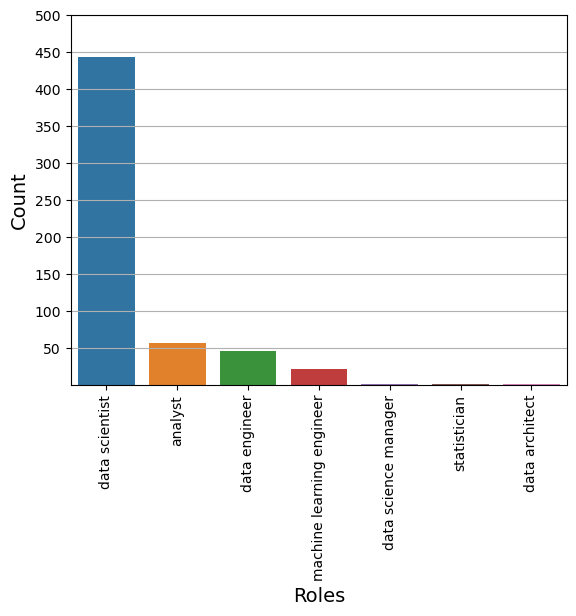

In [12]:
sns.barplot(data=roles,x="role",y="count")
plt.xticks(rotation=90)
plt.yticks(np.arange(50,501,50))
plt.xlabel("Roles",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.grid(axis='y')
plt.show()

#### The most number of openings is visible for the "Data Scientist" roles which is followed by "Analyst" and "Data Engineering" roles. But the difference in demand for data scientist and other roles is quite drastic. 

##### Let's try to grab a look at the percentage of job description that explicitly mention if it's a senior or junior level role :

In [13]:
print("Junior Roles : ",np.round(len(data.loc[(data["Job Description"].str.lower().str.contains("junior"))])/len(data)*100,3),"%")
print("Senior Roles : ",np.round(len(data.loc[(data["Job Description"].str.lower().str.contains("senior"))])/len(data)*100,3),"%")

Junior Roles :  4.097 %
Senior Roles :  20.182 %


Approximately 20% of the job postings are looking for a senior level role and around 4% of them are looking for a junior level role

##### Top 10 Companies with the maximum number of job postings:

In [52]:
data["Company Name"].value_counts()[:10]

Maxar Technologies              12
Tempus Labs                     11
AstraZeneca                     10
Klaviyo                          8
Autodesk                         7
Phoenix Operations Group         7
Southwest Research Institute     6
Novetta                          6
MassMutual                       5
Novartis                         5
Name: Company Name, dtype: int64